In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy as np
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import geopandas as gpd
import shapely
from matplotlib.ticker import FuncFormatter


In [172]:
shapefile = gpd.read_file("../data/geo/tl_2019_us_county/tl_2019_us_county.shp")
counties = ['42101', '42017', '42045', '42091']
counties = shapefile[[x in counties for x in shapefile['GEOID']]]
county_polys = [list(x.exterior.coords) for x in counties['geometry']]

In [163]:
type(list(shapefile[shapefile['STATEFP'] == "42"]['geometry'])[0])

shapely.geometry.polygon.Polygon

In [173]:
ys = []
xs = []
for x in county_polys:
    for coord in x:
        ys.append(coord[1])
        xs.append(coord[0])

In [260]:
places = np.array([
    (-75.172462, 40.198047),
    (-75.128977, 40.311564),
    (-75.314389, 40.022198)
])
visits = np.array([
    (0, 0),
    (0, 6),
    (1, 7),
    (1, 14),
    (2, 15),
    (2, 19),
    (0, 20),
    (0, 24)
])
x = [places[x[0]][0] for x in visits]
y = [places[x[0]][1] for x in visits]
z = [x[1] for x in visits]

lines = []
for i in range(len(places)):
    lines.append([
        [places[i][0], places[i][0]],
        [places[i][1], places[i][1]],
        [0, np.max(visits[:, 1][visits[:, 0] == i])]
    ])

In [258]:
def time_formatter(x, pos):
    hours = int(x)
    minutes = int((x - hours) * 60)
    return f'{hours:02d}:{minutes:02d}'

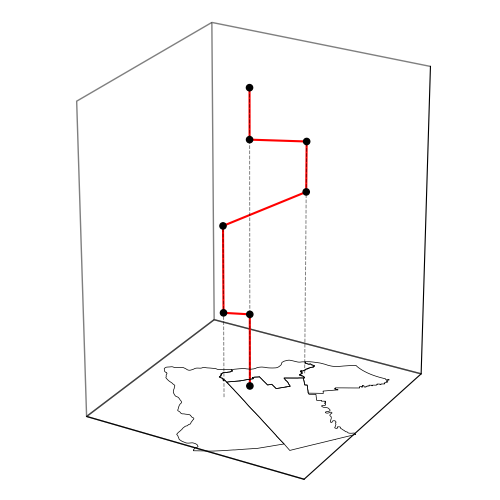

In [293]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='black', alpha=1)

ax.plot(x, y, z, color='red')

x_line = x[0]
y_line = y[0]
z_min = min(z) - 1
z_max = 24

for line in lines:
    ax.plot(line[0], line[1], line[2],
            color='black', 
            linestyle='dashed', 
            linewidth=0.7, 
            alpha=0.5)

z_plane = min(z_min, np.min(z))  # Position of the plane (a bit below the min z-value)
for poly in county_polys:
    poly3d = [[x, y, z_plane] for x, y in poly]  # Projecting polygon to the plane
    polygon = Poly3DCollection([poly3d], alpha=0, edgecolors='k', linewidths=0.5, facecolor="white")  # Black outline
    ax.add_collection3d(polygon)


ax.set_zlim([z_plane, max(z_max, 24)])

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.set_title('')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
ax.set_zlim([0, 24])

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xticks([])
ax.set_yticks([])

ax.set_zticks([])

ax.zaxis.set_major_formatter(FuncFormatter(time_formatter))

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

ax.view_init(elev=25., azim=300-180)

ax.set_box_aspect((1.1, 1.1, 1.5))

fig.set_size_inches(6, 10)


plt.savefig('../output/figs/spacetime_prism.png', dpi=300)

In [235]:
print((np.ptp(xs), np.ptp(ys), np.ptp(z)))

(0.9752629999999982, 0.8066609999999983, 24)


-75.56201999999999

In [7]:
import geopandas as gpd

# Read the shapefile
shapefile = gpd.read_file("../data/geo/tl_2019_us_county/tl_2019_us_county.shp")


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103886891,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329471929,16913419,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850602740,71274123,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039143,8841783,+32.3034298,-101.4387208,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


In [22]:
counties = ['42101', '42017', '42045', '42091']
counties = shapefile[[x in counties for x in shapefile['GEOID']]]
# extract polygon coords to list of x, y tuples
county_polys = [list(x.exterior.coords) for x in counties['geometry']]
county_polys

[[(-75.280266, 39.974964),
  (-75.27951, 39.975349),
  (-75.27913699999999, 39.975552),
  (-75.278938, 39.975654),
  (-75.27818599999999, 39.976040999999995),
  (-75.277669, 39.976312),
  (-75.276482, 39.976959),
  (-75.27613099999999, 39.977126999999996),
  (-75.275871, 39.977244999999996),
  (-75.275468, 39.977429),
  (-75.275284, 39.977512),
  (-75.273552, 39.978279),
  (-75.27315399999999, 39.978455),
  (-75.273026, 39.978511999999995),
  (-75.272255, 39.978854999999996),
  (-75.27153, 39.979175999999995),
  (-75.271309, 39.979275),
  (-75.269257, 39.980185999999996),
  (-75.267973, 39.980757),
  (-75.267398, 39.981013999999995),
  (-75.26724999999999, 39.981079),
  (-75.266251, 39.981525),
  (-75.26556599999999, 39.981832),
  (-75.265511, 39.981857),
  (-75.264748, 39.982192999999995),
  (-75.264386, 39.982355999999996),
  (-75.26435099999999, 39.982372),
  (-75.26368699999999, 39.982658),
  (-75.262946, 39.983045),
  (-75.262794, 39.983124),
  (-75.262512, 39.98328),
  (-75.26078